In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 플롯팅을 위한 셋팅입니다.
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)  # X축 라벨의 글자 크기
mpl.rc('ytick', labelsize=12)  # Y축 라벨의 글자 크기
mpl.rc('figure', figsize=(12, 6))

In [2]:
np.random.seed(42)

# Decision Tree Classifier

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

Iris dataset을 가지고 테스트를 진행하겠습니다. 트리 분류기를 구현하고, 시각화까지 하겠습니다.

## 1. 데이터셋 로딩

In [4]:
iris = load_iris()

In [5]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

꽃잎의 길이, 꽃잎의 넓이만 사용해보겠습니다.

In [6]:
X = iris.data[:, 2:]
y = iris.target

In [7]:
X[:3]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2]])

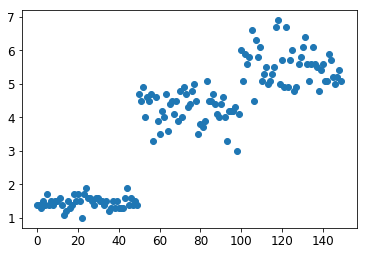

In [8]:
# 꽃잎의 길이 : 데이터의 분포를 간단하게 살펴보자.
plt.plot(X[:,0], "o")

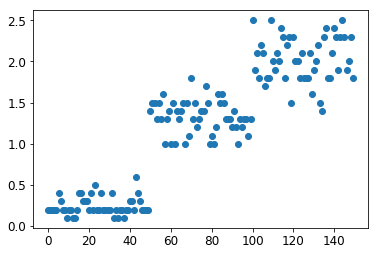

In [9]:
# 꽃잎의 넓이 : 데이터의 분포를 간단하게 살펴보자.
plt.plot(X[:,1], "o")

 - 트리를 학습하고
 - 트리의 시각화를 살펴보겠습니다.

## 2. Train / test set을 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_x, test_x, train_y, test_y = \
    train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(120, 2)
(120,)
(30, 2)
(30,)


## 3. 모델 학습

데이터의 수가 적습니다. 모델을 학습하면서 성능을 도중에 평가하고, 오버피팅을 확인하기 위하여 cross validation을 사용하겠습니다.

In [13]:
from sklearn.model_selection import cross_val_score

`DecisionTreeClassifier`를 이용하여 학습을 하겠습니다.

In [14]:
# Max depth는 2로 설정하겠습니다. 즉 분기는 최대 3번만 되는 것입니다.
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [15]:
cross_val_score(tree_clf, train_x, train_y, cv=3, scoring='accuracy')

array([0.97560976, 0.9       , 0.94871795])

파라미터를 그대로 활용하여 모델을 학습시키겠습니다.

In [16]:
tree_clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

결과를 보면, 정확도가 많게는 7%이상, 적게는 3%이상 차이가 납니다. 즉, 모델이 오버피팅되는 경향을 보이고 있습니다. Tree 모델의 어쩔수 없는 한계입니다.

트리를 그려보기 위해서, `graphviz`를 활용합니다.

In [17]:
from sklearn.tree import export_graphviz
from graphviz import Source

In [18]:
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display

graph = Source(export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True))

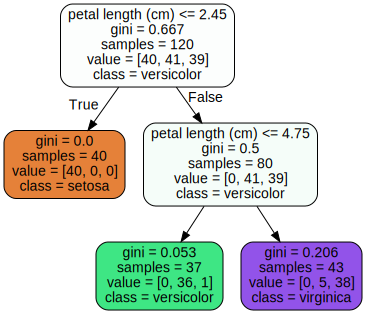

In [19]:
SVG(graph.pipe(format='svg'))

Question 1)
- gini가 0인 경우는 언제일까?

Question 2) 새로운 샘플에 대하여 분류를 적용해보자.
- 꽆 잎의 길이가 2.45cm 보다 작은 경우?
- 꽃 잎의 길이가 2.45cm 보다 큰 경우?
 - 꽃 잎의 갈이가 4.75cm 보다 작은 경우?
 - 꽃 잎의 길이가 4.75cm 보다 큰 경우?

결정 트리의 여러 장점 중 하나는 데이터 전처리가 거의 필요하지 않다는 것이다. <font color=red>특히 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다.</font>

Sklearn은 binary tree만 만드는 **CART 알고리즘**을 사용한다. Leaf node 외의 모든 노드는 자식 노드를 두 개씩 가진다(질문에 대한 답은 Yes, No). 하지만 ID3 같은 알고리즘은 둘 이상의 자식 노드를 가진 결정 트리를 만들 수 있다.

---
결정 트리의 경계를 살펴보겠습니다. 해당 코드를 완벽히 몰라도 됩니다.

Line 11에서 prediction 값을 구하고, Line 14에서 이것을 이용하여 plotting을 합니다.

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # Axes는 x축과 y축을 의미한다. 100개씩 segmentation 한다.
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Pred 값을 구한다.
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plot_decision_boundary(tree_clf,  train_x, train_y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.75, 4.75], [0, 1.75], "k:", linewidth=2)
plt.plot([4.75, 4.75], [1.75, 3], "k:", linewidth=2)
plt.text(1.65, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.25, 0.5, "(Depth=2)", fontsize=11)

---

**모델 해석 : 화이트박스와 블랙박스**

결정 트리는 매우 직관적이고 결정 방식을 이해하기 쉽다. 이런 모델을 화이트 박스(white box) 모델이라고 한다. 반대로 랜덤 포레스트, 신경망은 블랙 박스(black box) 모델이라고 한다. 이 알고리즘들은 성능이 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인할 수 있다. 그렇지만 왜 그런 예측을 만드는지는 쉽게 설명하기 어렵다. 

---

Decision tree를 이용하여 샘플에 대한 확률값을 구합니다.

`predict_proba`를 사용하면 각 클래스에 대해서, 해당 샘플이 각 클래스에 속할 확률이 나옵니다.

In [ ]:
# 꽃의 종류가 3개(클래스가 3개) 입니다.
tree_clf.predict_proba([[5, 1.5]])

`predict`는 `predict_proba`의 결과값을 바탕으로, 해당 샘플이 속할 클래스의 값을 바로 출력해줍니다.

In [ ]:
tree_clf.predict([[5, 1.5]])

## 4. 모델의 평가

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred_y = tree_clf.predict(test_x)
accuracy_score(test_y, pred_y)

#### (연습) 아래의 코드를 이용하여 wine 데이터를 로딩합니다. 결정 트리를 학습해보고, 시각화해보겠습니다.
- `data = load_wine()`
- feature는 *alcohol*, *proline*를 사용한다.

## *트리의 불안정성*

데이터에 변형을 주었을 때, 트리가 어떻게 바뀌는지를 살펴보고자 합니다.

In [ ]:
# Iris-Versicolor 클래스에 속하고 꽃잎의 넓이가 가장 큰 샘플을 찾습니다.
train_x[(train_x[:, 1]==train_x[:, 1][train_y==1].max()) \
        & (train_y==1)] 

In [ ]:
# Versicolor에서 꽃잎의 넓이가 가장 큰 데이터를 제외하고 학습합니다.
# 트리가 학습셋에 민감하다는 것을 보여주기 위함입니다.
not_widest_versicolor = (train_x[:, 1]!=1.8) | (train_y==2)
X_tweaked = train_x[not_widest_versicolor]
y_tweaked = train_y[not_widest_versicolor]

# 제외한 데이터를 이용하여 학습합니다.
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

데이터 샘플이 1개를 제외하고 학습하니, 결정경계가 변했습니다. 이를 통해서 Decision tree는 분산이 높은 모델이라는 것을 알 수 있습니다.

##  *규제화*

결정 트리는 훈련 데이터에 대한 제약사항이 거의 없다. 따라서 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉽다. <font color=red>결정 트리는 모델 파라미터가 전혀 없는 것이 아니라, 훈련되기 전에 파라미터 수가 결정되지 않는 것이다</font>. 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 **non-parametric model**이라고 한다. 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유롭다. 반대로 선형 모델 같은 parametric model은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합 될 위험이 줄어든다.

<font color=red>훈련 데이터에 대한 과대적합을 피하기 위해 학습할 때 결정 트리의 자유도를 제한할 필요가 있다</font>. 이것을 **규제**라 한다. 규제 매개변수는 사용하는 알고리즘에 따라 다르지만, 보통 적어도 결정 트리의 최대 깊이는 제어할 수 있다. Sklearn에서는 *max_depth*를 조절하여 트리를 규제할 수 있다.

또한
 - *min_samples_split*
 - *min_samples_leaf*
 - *min_weight_fraction_leaf*
 - *max_leaf_node*
 
도 모델의 규제를 조절하는 파라미터이다.

*make_moon* 데이터를 이용하여 규제화를 분석해보자. 간단하게 `min_samples_leaf`를 이용하여 모델을 규제하자.

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
# Sample을 100개만 가지고 올 것이다.
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=42)

In [ ]:
# 첫 번째 트리를 학습 한다.
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
# 두 번째 트리는 min_samples_leaf를 이용하여 규제를 한다.
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [ ]:
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

`min_samples_leaf`를 조절하는 것만으로 모델의 복잡도가 더 낮아지는 것을 확인할 수 있다. 즉, 트리의 분산이 줄어든 것을 간략하게나마 눈으로 확인할 수 있다.

# Decision Tree Regressor

## 1. 데이터 로딩

Synthetic 데이터를 생성해보겠습니다.

$$y = 4 \times (x - 0.5)^2 + \text{noise}$$

In [ ]:
# Quadratic training set + noise
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [ ]:
plt.plot(X, y, 'o')

## 2. 모델 학습

깊이가 2, 3인 모델을 각각 학습시켜 보겠습니다.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# max_depth=2 
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
# max_depth=3 : 1번 회귀 트리모형보다 더 복잡도가 높은 트리 모델
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

첫 번째 학습트리를 시각화합니다.

In [ ]:
graph1 = Source(export_graphviz(
        tree_reg1,
        out_file=None,
        feature_names=['x1'],
        rounded=True,
        filled=True))

In [ ]:
SVG(graph1.pipe(format='svg'))

Classifier는 **gini**를 기준으로 활용하지만, regressor는 **mse**를 기준으로 활용한다는 것을 시각화 도표를 통해 알 수 있습니다.

In [ ]:
graph2 = Source(export_graphviz(
        tree_reg2,
        out_file=None,
        feature_names=['x1'],
        rounded=True,
        filled=True))

In [ ]:
SVG(graph2.pipe(format='svg'))

---

아래의 코드는 정확히 몰라도 됩니다. 하지만 Tree regressor에서 결정경계가 어떻게 시각화 되는지를 확인할 수 있습니다. 

Line 5에서 트리 모델의 예측값을 얻어오는 것을 볼 수 있습니다.

In [ ]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    
    # 예측값을 구합니다.
    y_pred = tree_reg.predict(x1)
    
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

빨간선은 해당 노드에 속한 **데이터들의 평균값**입니다. 즉 **평균값이 예측값**이 됩니다.

---

## *회귀에서의 규제*

`min_samples_leaf`를 이용하여 규제를 합니다.

In [ ]:
# 규제가 없는 모델
tree_reg1 = DecisionTreeRegressor(random_state=42)
# 규제가 있는 모델
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

In [ ]:
# 규제가 없는 모델의 시각화 도표입니다.
graph1 = Source(export_graphviz(
        tree_reg1,
        out_file=None,
        feature_names=['x1'],
        rounded=True,
        filled=True))

SVG(graph1.pipe(format='svg'))

In [ ]:
# 규제가 있는 모델의 시각화 도표입니다.
graph2 = Source(export_graphviz(
        tree_reg2,
        out_file=None,
        feature_names=['x1'],
        rounded=True,
        filled=True))

SVG(graph2.pipe(format='svg'))

---

이 코드 또한 상세하게 내용을 몰라도 됩니다. 하지만 line 2, line 3에서의 예측값들을 플롯팅한것을 볼 수 있습니다.

규제가 없는 모델은 데이터에 오버피팅 된 것을 볼 수 있습니다. 따라서 분산이 높습니다.

규제가 있는 모델은, 없는 모델에 비해서 덜 오버피팅 된 것을 볼 수 있습니다.

In [ ]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

---

# Tree model 학습 및 튜닝 연습!

Moons dataset을 이용하여 학습을 합니다.

`make_moons(n_samples=10000, noise=0.4)`.

## 1. 데이터 로딩

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

## 2. Train / test set 구분

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Hyperparameter 찾기 with cross validation

고정된 hyperparameter를 가지고 cross-validation을 이용하여 학습하는 것은 `cross_val_score`을 사용하면 됩니다. 

<font color=red>Cross validation을 수행하여 모델의 성능 및 오버피팅 여부를 확인하며, 최적의 hyperparameter를 찾는 것</font>은 중요합니다. 그것은 `GridSearchCV`를 이용하면 가능합니다. 

해당 모듈을 사용하여 `DecisionTreeClassifier` 의 하이퍼파라미터를 찾도록 하겠습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

찾고자 하는 hyperparameter는
 - *max_leaf_nodes*
 - *min_samples_split*

입니다.

In [ ]:
params = {'max_leaf_nodes': list(range(2, 7)), 
          'min_samples_split': [2, 3, 4]}

grid_search_cv = \
    GridSearchCV(
        DecisionTreeClassifier(random_state=42), 
        params, 
        n_jobs=-1, 
        verbose=1, 
        cv=3)

grid_search_cv.fit(X_train, y_train)

In [ ]:
# Cross validation score
grid_search_cv.best_score_

Cross validation을 통한 hyperparameter를 찾는 과정에 대한 결과를 다음과 같이 볼 수 있습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 참고하면 됩니다.

In [ ]:
results = grid_search_cv.cv_results_

# DataFrame을 통해서 보면 편합니다.
pd.DataFrame(results)

Grid search를 통해서 얻은 최적의 분류기는 아래와 같이 사용할 수 있습니다.

`mean_test_score`에서 가장 높은 값을 선택하고, 그 값에 대응되는 hyperparameter를 선택하게 됩니다.

In [ ]:
grid_search_cv.best_estimator_

Grid search를 통해 얻은 최적의 estimator의 성능을 측정해보겠습니다. 이것은 아래의 코드를 이용하여 수행할 수 있습니다.

- Grid search를 그대로 이용

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

- Grid search에서 얻은 최적 estimator를 리턴받고, 그것을 이용

In [ ]:
y_pred = grid_search_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)